In [1]:
from leaf_area import *
import cv2
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data = np.load('LeafCounting/data/dataset_folder_5.npz', allow_pickle=True)

In [3]:
x = data['arr_0']
y = data['arr_1']

In [4]:
x.shape

(74, 240, 240, 3)

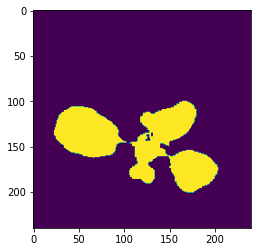

In [6]:
output, mask = extract_leaf(x[30])
plt.imshow(mask)

In [7]:
print(calculate_leaf_area("E:/Dataset/A5/rgb_00_009_05.png"))

0.13899305555555555


In [8]:
print(calculate_green_pixel(mask)/(240*240)*100)

13.854166666666668
